In [1]:
import matplotlib as mp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import bokeh
import datetime as dt


In [2]:
limeKiln = {}
orcaSound = {}

limeKiln['location'] = np.array((-5,-16))
orcaSound['location'] = np.array((16,5))


In [3]:
for i in range(10):
    print(dt.datetime.now() + dt.timedelta(hours=i/10))

2018-04-17 11:53:07.072428
2018-04-17 11:59:07.073027
2018-04-17 12:05:07.073068
2018-04-17 12:11:07.073095
2018-04-17 12:17:07.073188
2018-04-17 12:23:07.073216
2018-04-17 12:29:07.073240
2018-04-17 12:35:07.073324
2018-04-17 12:41:07.073353
2018-04-17 12:47:07.073377


In [4]:
def calc_intensity(sensor_loc, object_loc, scale_factor=1.0):
    """calc_intensity figures out the euclidean distance between two points and scales
       the intensity appropriately as 1/r^2 and a scale factor (meant to be for acoustics)"""
    distance = np.linalg.norm(sensor_loc - object_loc)
    return scale_factor*(1/(distance**2))

    

In [5]:
calc_intensity(limeKiln['location'], orcaSound['location'])

0.0011337868480725626

In [6]:
calc_intensity(limeKiln['location'], orcaSound['location'],2.0)

0.0022675736961451252

In [7]:
orca_start = np.array([-16.5,-16.5])

In [8]:
print(calc_intensity(orca_start, limeKiln['location']),
calc_intensity(orca_start, orcaSound['location']))


0.00754716981132 0.000658544616398


In [9]:
vel = np.array((1,1))

In [10]:
orca_start + 2*vel

array([-14.5, -14.5])

In [11]:
orca_locations = []
for i in range(33):
    orca_locations.append(orca_start + i*vel)
    

In [12]:
limeKiln['obs'] = []
orcaSound['obs'] = []
orca_locations

[array([-16.5, -16.5]),
 array([-15.5, -15.5]),
 array([-14.5, -14.5]),
 array([-13.5, -13.5]),
 array([-12.5, -12.5]),
 array([-11.5, -11.5]),
 array([-10.5, -10.5]),
 array([-9.5, -9.5]),
 array([-8.5, -8.5]),
 array([-7.5, -7.5]),
 array([-6.5, -6.5]),
 array([-5.5, -5.5]),
 array([-4.5, -4.5]),
 array([-3.5, -3.5]),
 array([-2.5, -2.5]),
 array([-1.5, -1.5]),
 array([-0.5, -0.5]),
 array([ 0.5,  0.5]),
 array([ 1.5,  1.5]),
 array([ 2.5,  2.5]),
 array([ 3.5,  3.5]),
 array([ 4.5,  4.5]),
 array([ 5.5,  5.5]),
 array([ 6.5,  6.5]),
 array([ 7.5,  7.5]),
 array([ 8.5,  8.5]),
 array([ 9.5,  9.5]),
 array([ 10.5,  10.5]),
 array([ 11.5,  11.5]),
 array([ 12.5,  12.5]),
 array([ 13.5,  13.5]),
 array([ 14.5,  14.5]),
 array([ 15.5,  15.5])]

In [13]:
init_time = dt.datetime.now()
i = 1;
for orca_loc in orca_locations:
    limeKiln['obs'].append(([init_time + dt.timedelta(hours=i*33./10)], calc_intensity(orca_loc,limeKiln['location'])))
    orcaSound['obs'].append(([init_time + dt.timedelta(hours=i*33./10)], calc_intensity(orca_loc,orcaSound['location'])))
    i += 1

In [14]:
limeKiln['df'] = pd.DataFrame(limeKiln['obs'])
orcaSound['df'] = pd.DataFrame(orcaSound['obs'])

orcaLocationsDF = pd.DataFrame(orca_locations)
#plt.plot(orcaLocationsDF[0],orcaLocationsDF[1],'o')
fig,ax = plt.subplots()
ax.plot(limeKiln['location'][0],limeKiln['location'][1],'r*')
ax.plot(orcaSound['location'][0],orcaSound['location'][1],'r*')
ax.scatter(orcaLocationsDF[0],orcaLocationsDF[1],c=orcaSound['df'][1]*10)

#plot large circle centered on sensor, colored by intensity and alpha trans by age.
#this is just to test the idea. Next, animate these "pings" over time.

watchCircle1 = plt.Circle(orcaSound['location'],
                         radius=10.0,
                         alpha=0.5,
                         fc='r')
watchCircle = plt.Circle(orcaSound['location'],
                         radius=20.0,
                         alpha=0.5,
                         fc='r')
wcHandle = ax.add_patch(watchCircle)
wcHandle1 = ax.add_patch(watchCircle1)
ax.axis('scaled')


(-19.342338709677421,
 38.635349462365589,
 -18.909644039735099,
 27.090935430463578)

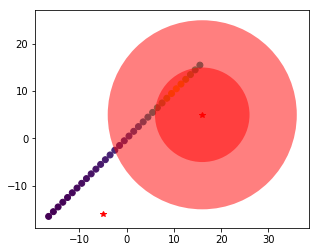

In [15]:
plt.show()

In [102]:
#from: http://tiao.io/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig.clf()
fig, ax = plt.subplots()

#ax.axis('equal')
ax.axis('scaled')
ax.set_xlim(( -30, 30))
ax.set_ylim((-30, 30))


#line, = ax.plot([], [], lw=2)
ax.plot(limeKiln['location'][0],limeKiln['location'][1],'k*')
ax.plot(orcaSound['location'][0],orcaSound['location'][1],'k*')

lkCirclePatch = plt.Circle((limeKiln['location'][0],limeKiln['location'][1]),radius=1,color='r')
osCirclePatch = plt.Circle((orcaSound['location'][0],orcaSound['location'][1]),radius=1,color='r')
lkFadeCircle = ax.add_patch(lkCirclePatch)
osFadeCircle = ax.add_patch(osCirclePatch)
orcaLoc, = ax.plot([],[],'bo',) 
orcaLoc.set_zorder(1000)
# cpsarason: we're going to animate a circle and control it's color/alpha, 
# so this will be a little different

# initialization function: plot the background of each frame
# def init():
#     line.set_data([], [])
#     return (line,)

# initialization function: plot the background of each frame
def init():
    orcaLoc.set_data([], [],)
    lkCirclePatch.set_radius(1)
    osCirclePatch.set_radius(1)
    return (orcaLoc,lkCirclePatch,osCirclePatch)

# animation function. This is called sequentially
# def animate(i):
#     x = np.linspace(0, 2, 1000)
#     y = np.sin(2 * np.pi * (x - 0.01 * i))
#     line.set_data(x, y)
#     return (line,)

# animation function. This is called sequentially
def animate(i):
    orcaLoc.set_data(orca_locations[i])
    orcaLoc.set_alpha(min((orcaSound['df'][1][i] + limeKiln['df'][1][i])*40,1))
    lkCirclePatch.set_radius(30)
    lkCirclePatch.set_alpha(min(limeKiln['df'][1][i]*50,0.9))
    osCirclePatch.set_radius(30)
    osCirclePatch.set_alpha(min(orcaSound['df'][1][i]*50,0.9))
    #pingCircle.set_markersize(i*10)
    #pingAlpha = min(1/(i+0.1),1)
    #pingCircle.set_alpha(pingAlpha)
#     for j in range(10):
#         pingFadeCircle.set_data(orca_locations[i]+(0,j))
#         pingAlpha = min(1/(j+0.1),1)
#         pingFadeCircle.set_alpha(pingAlpha)
    return (orcaLoc,pingCirclePatch)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=33, interval=200, blit=True)

# cpsarason: This one is hard-coded to only change alpha value on fixed circles
#            In a more developed animation, for each orca position we would add another
#            circle patch "detection" at the receiver and add up all the "detection" 
#            values to plot a surface that corresponds to a likelihood value. 
#           
#            A modified version of this 
HTML(anim.to_html5_video())

/home/cpsarason/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [95]:
(orcaSound['df'][1][1] + limeKiln['df'][1][1])*70

0.68304168501982132

In [ ]:
test = np.array(limeKiln['obs'])
test2 = np.array(orcaSound['obs'])
plt.plot(test[:,0],test[:,1])
plt.plot(test2[:,0],test2[:,1])
plt.show()

In [43]:
pingFadeCircle

In [44]:
orcaLoc